# Méthode de point intérieur

L'objectif de ce TP est d'utiliser des méthodes de point intérieur pour minimiser une fonction sous contrainte.
$newcommand{\R}{\mathbb{R}}$
$newcommand{\umin}[1]{\underset{#1}{\min}\;}$
$DeclareMathOperator{\eqdef}{\overset{\tiny def}{=}}$

# Méthode de point intérieur

## I - Contrainte non-linéaire

Soit $f$ une fonction régulière de $\mathbb{R}^n$ dans $\mathbb{R}$, nous nous intéresserons à deux types de problème :

1. **Le problème à contrainte linéaire**
$$(\mathcal{P}_{\infty,\text{ lin.}}) \qquad \umin{x\in \mathbb{R}^n, A x \leq b} f(x)$$
où $A$ est une matrice $\mathcal M_{pn}(\mathbb{R})$ et $b\in \mathbb{R}^p$.

2. **Le problème avec une contrainte non linéaire**
$$(\mathcal{P}_{\infty,\text{ non lin.}}) \qquad \umin{x\in \mathbb{R}^n, g(x)\le 0} f(x)$$
où $g$ est une fonction régulière de $\mathbb{R}^n$ dans $\mathbb{R}$.

### Méthode des barrières logarithmiques

L'idée des méthodes de point intérieur est d'approximer les problèmes $(\mathcal P_{\infty,\bullet})$ en utilisant des [fonctions barrières logarithmiques](https://en.wikipedia.org/wiki/Barrier_function) :

**Cas non-linéaire:**
$$(\mathcal{P}_{t, \text{non-lin.}}) \qquad \umin{x\in \mathbb{R}^d} f_t(x) \eqdef f(x) - \frac{1}{t} \ln( -g(x)  )$$

**Cas linéaire:**
$$(\mathcal{P}_{t, \text{ lin.}}) \qquad \umin{x\in \mathbb{R}^d} f_t(x) \eqdef f(x) - \frac{1}{t} \text{Log}( b-A x  )$$

où $\text{Log}(u) \eqdef \sum_i \ln(u_i)$.

La fonction $-\text{Log}$ (ou $-\ln$), qui est strictement concave, agit comme une barrière pour la contrainte. On s'attend à ce qu'à la limite, quand $t \to +\infty$, le problème $(\mathcal P_{t,\bullet})$ tende vers le problème $(\mathcal P_{\infty,\bullet})$.

### Calcul du gradient et de la Hessienne

Pour la contrainte non-linéaire, avec $f_t = f - \frac{1}{t} \ln(-g)$ :

$$\nabla f_t(x) = \nabla f(x) - \frac{1}{t} \cdot \frac{1}{g(x)} \cdot \nabla g(x)$$

$$H[f_t](x) = H[f](x) - \frac{1}{t}\left(\frac{1}{g(x)} H[g](x) - \frac{1}{g(x)^2} \nabla g(x) \nabla g(x)^{\top}\right)$$

$$
f_t(x) = f(x) - \frac{1}{t}\ln(-g(x)).$$

### Gradient
$$
\nabla f_t(x)
= \nabla f(x) - \frac{1}{t}\,\frac{1}{g(x)}\,\nabla g(x).
$$

### Hessienne
$$
H[f_t](x)
= H[f](x)
- \frac{1}{t}\left(
\frac{1}{g(x)}\,H[g](x)
- \frac{1}{g(x)^2}\,\nabla g(x)\nabla g(x)^{\top}
\right).
$$


On suppose que `f` et `g` sont des fonctions définies avec une classe dans le fichier `functions.py` (ainsi les calculs du gradient ou de la Hessienne de `f` et de `g` sont déjà faits). Créer ci-dessous une classe `non_lin_cst` qui calcule `f_t`, son gradient ou sa Hessienne. La classe prend à la construction la fonction `f`, la fonction `g` et la valeur de `t`. Le constructeur de la classe est déjà implémenté.
Attention, dans le cas où `g(x)` est $>0$, la fonction `value(self,x)` doit rendre `np.inf` et ne doit pas rendre une erreur.

In [1]:
import math as m
import numpy as np
import matplotlib.pyplot as plt
import functions as func
import Optim as opt

In [2]:
class square2() :
    def __init__(self) :
        self.zeros()
    def zeros(self) :
        self.nb_eval=0 # number of evaluations of the function self.value()
        self.nb_grad=0 # number of evaluations of the function self.grad()
        self.nb_hess=0 # number of evaluations of the function self.Hess()
    def value(self,x) :
        # returns the value of the function at point x
        self.nb_eval+=1
        return 0.5*x[0]**2+7/2.*x[1]**2-1
    def grad(self,x) :
        # returns the gradient of the function at point x
        self.nb_grad+=1
        return np.array([x[0],7*x[1]])
    def Hess(self,x) :
        # returns the Hessian of the function at point x
        self.nb_hess+=1
        to_return=np.zeros((2,2))
        to_return[0,0]=1
        to_return[1,1]=7
        return to_return


class non_lin_cst() :
    def __init__(self,f,g,t, nb_constraints=1.) :
        self.zeros()
        self.f=f
        self.g=g
        self.t=t
        self.nb_constraints=nb_constraints # nombre de contraintes du problème
    def zeros(self) :
        self.nb_eval=0 # number of evaluations of the function self.value()
        self.nb_grad=0 # number of evaluations of the function self.grad()
        self.nb_hess=0 # number of evaluations of the function self.Hess()
    def value(self,x) :
        # returns the value of the function at point x
        self.nb_eval += 1
        l = np.log(-self.g.value(x)) if self.g.value(x) < 0 else -np.inf
        return self.f.value(x) - 1/self.t * l
    def grad(self,x) :
        # returns the gradient of the function at point x
        self.nb_grad += 1
        return self.f.grad(x) - 1/(self.t*self.g.value(x)) * self.g.grad(x)
    def Hess(self,x) :
        # returns the Hessian of the function at point x
        #Il faut reshape le gradient sinon ça ne fonctionne pas
        self.nb_hess += 1
        le_grad = self.g.grad(x).reshape((2,1))
        return self.f.Hess(x) - 1/self.t * (-1/(self.g.value(x)**2) * le_grad @ le_grad.transpose() + 1/self.g.value(x) * self.g.Hess(x))
    

f_t=non_lin_cst(func.Rosen(),square2(),0.33)
x_0=np.array([0.,0.])
print('Doit être 1.0=',f_t.value(x_0))
x_0=np.array([0.2,0.12])
print('Doit être 1.5012148269226977=',f_t.value(x_0))
x_0=np.array([2,1.3])
print('Doit être inf =',f_t.value(x_0))
print('######## TEST DE DERIVEE NUMERIQUE')
a=np.array([0.2,0.12])
d=np.random.randn(2)
opt.deriv_num(f_t,a,d)

Fonction (x,y) --> 100*(y-x^2)^2 +(1-x)^2
Doit être 1.0= 1.0
Doit être 1.5012148269226977= 1.5012148269226977
Doit être inf = inf
######## TEST DE DERIVEE NUMERIQUE
eps 1.0e-01 grad 1.0e+00 ratio 6.3e-01 angle 9.0e-02
eps 1.0e-02 grad 4.6e-02 ratio 4.7e-02 angle 1.3e-03
eps 1.0e-03 grad 4.1e-03 ratio 4.6e-03 angle 1.3e-05
eps 1.0e-04 grad 4.1e-04 ratio 4.6e-04 angle 1.3e-07
eps 1.0e-05 grad 4.1e-05 ratio 4.6e-05 angle 1.3e-09
eps 1.0e-06 grad 4.1e-06 ratio 4.6e-06 angle 1.3e-11
eps 1.0e-07 grad 4.1e-07 ratio 4.6e-07 angle 1.3e-13
eps 1.0e-08 grad 4.0e-08 ratio 4.4e-08 angle 1.4e-15
eps 1.0e-09 grad 1.6e-08 ratio 6.3e-09 angle 2.2e-16
eps 1.0e-10 grad 6.4e-08 ratio 5.8e-08 angle 1.9e-15
eps 1.0e-11 grad 1.2e-06 ratio 3.8e-07 angle 2.8e-13
eps 1.0e-12 grad 3.6e-06 ratio 5.8e-06 angle 1.4e-11


## Algorithme d'optimisation
Vous devez récupérer votre algorithme de Newton ainsi que la recherche linéaire de Wolfe (avec un step initial de $1$ ) dans la cellule ci-dessous.

In [3]:
def ls_wolfe(x, function, step, descent, f, df):
    """
    Recherche linéaire satisfaisant les conditions de Wolfe.
    
    Paramètres
    ----------
    x : ndarray
        Point courant
    function : objet
        Doit fournir value(x) et grad(x)
    step : float
        Pas initial
    descent : ndarray
        Direction de descente
    f : float
        Valeur f(x)
    df : ndarray
        Gradient ∇f(x)
    """

    # Bornes sur le pas
    step_max = np.inf
    step_min = 0

    # Constantes de Wolfe
    eps1 = 1e-4   # condition d'Armijo (décroissance suffisante)
    eps2 = 0.9    # condition de courbure

    # Initialisation
    step2 = step
    x2 = x + step2 * descent
    f2 = function.value(x2)
    df2 = function.grad(x2)

    # Boucle jusqu'à satisfaction des conditions de Wolfe
    while (f2 > f + eps1 * step2 * np.dot(df, descent)) \
          or (np.dot(df2, descent) < eps2 * np.dot(df, descent)):

        # Condition d'Armijo non satisfaite : pas trop grand
        if f2 > f + eps1 * step2 * np.dot(df, descent):
            step_max = step2
            step2 = (step_min + step_max) / 2

        # Condition de courbure non satisfaite : pas trop petit
        else:
            step_min = step2
            if step_max == np.inf:
                step2 = 2 * step2
            else:
                step2 = (step_min + step_max) / 2

        # Mise à jour du point testé
        x2 = x + step2 * descent
        f2 = function.value(x2)
        df2 = function.grad(x2)

    # Retour du point acceptable et du pas associé
    return x2, f2, df2, step2


def ls_wolfe_step_is_one(x, function, step, descent, f, df):
    """
    Version simplifiée : on force le pas initial à 1
    (classique en méthode de Newton/quasi-Newton)
    """
    return ls_wolfe(x, function, 1., descent, f, df)


def dc_Newton(x, function, df):
    """
    Calcul d'une direction de descente de type Newton,
    avec repli sur la descente de gradient si nécessaire.
    """

    # Hessienne au point courant
    Hess = function.Hess(x)

    # Direction de Newton
    descent = -np.linalg.inv(Hess) @ df

    # Cosinus de l'angle entre la direction et -∇f
    costheta = (np.dot(descent, -df)) / (
        np.linalg.norm(descent, 2) * np.linalg.norm(df, 2)
    )

    # Si la direction de Newton n'est pas suffisamment descendante,
    # on utilise la descente de gradient
    if costheta <= 0.1:
        descent = -df

    return descent

On peut maintenant lancer une optimisation en utilisant la méthode de Newton avec un pas de Wolfe initialisé à $1$.

In [4]:
f_t=non_lin_cst(func.Rosen(),square2(),0.33)
res=opt.main_algorithm(f_t,5,np.array([0,0]),dc_Newton,ls_wolfe_step_is_one,tol=1.e-7,verbose=True)
final_x=res['list_x'][-1]
print('x final=',final_x)
# VOUS DEVEZ TROUVER
#Fonction de Rosenbrock
#Fonction (x,y) --> x^2/2+7/2*y^2-1
#Fonction Interior point method
#iter=   0 f=1.000e+00 df=2.000e+00 comp=[   1,   1,   0]
#iter=   1 f=8.586e-01 df=8.192e+00 comp=[   3,   2,   1]
#iter=   2 f=7.028e-01 df=3.443e-01 comp=[   4,   3,   2]
#iter=   3 f=6.973e-01 df=2.196e-01 comp=[   5,   4,   3]
#iter=   4 f=6.972e-01 df=1.166e-03 comp=[   6,   5,   4]
#iter=   5 f=6.972e-01 df=6.426e-07 comp=[   7,   6,   5]
#iter=   6 f=6.972e-01 df=3.988e-14 comp=[   8,   7,   6]
#Success !!! Algorithm converged !!!
#x final= [0.25636244 0.05915168]

Fonction (x,y) --> 100*(y-x^2)^2 +(1-x)^2
iter=   0 f=1.000e+00 df=2.000e+00 comp=[   1,   1,   0]
iter=   1 f=8.586e-01 df=8.192e+00 comp=[   3,   3,   1]
iter=   2 f=7.028e-01 df=3.443e-01 comp=[   4,   4,   2]
iter=   3 f=6.973e-01 df=2.196e-01 comp=[   5,   5,   3]
iter=   4 f=6.972e-01 df=1.166e-03 comp=[   6,   6,   4]
iter=   5 f=6.972e-01 df=6.426e-07 comp=[   7,   7,   5]
iter=   6 f=6.972e-01 df=4.169e-14 comp=[   8,   8,   6]
Success !!! Algorithm converged !!!
x final= [0.25636244 0.05915168]


## La méthode du chemin central
Notre objectif est d'envoyer le paramètre $t$ vers $+\infty$. Pour ce faire on va suivre la méthode du chemin central, nous commençons par nous donner $t_1$ et nous notons $x_0$ le point initial et $x_1$ le minimiseur donné de $f_{t_1}$ par une méthode de Newton commençant à $x_0$. Ensuite nous multiplions $t_1$ par $\mu$ pour obtenir $t_2$ et nous lançons une méthode de Newton commençant à $x_1$. On note $x_2$ le résultat obtenu. 
Ainsi nous allons construire une suite de points solutions du problème 
$$x_k \in \textrm{argmin} f_{t_k}(x).$$
avec $t_{k}=\mu t_{k-1}$ et $x_{k}$ une solution donnée par un algorithme de Newton (avec recherche de Wolfe) et avec comme point de départ $x_{k-1}$. L'idée d'utiliser comme initialisation la solution d'un problème d'optimisation s'appelle "warm restart".

On peut montrer que l'erreur que l'on fait entre $x_k$ et $x^\star$ (où $x^\star$ est le minimum de $f$) vérifie :
$$ 0 \le f(x_k)-f(x^\star)\le \frac{p}{t_k},$$
où $p$ est le nombre de contraintes. Ainsi on va s'arrêter dès que $\varepsilon t_k > p$ où $\varepsilon$ est la précision de l'algorithme de Newton.
Ecrire une fonction `def central_path(function,mu,varepsilon,x0)` qui implémente cette stratégie. Elle prend en argument 
 1. `function`: une instance de la classe `non_lin_cst`
 2. `mu`: un réel $>1$ qui est le facteur multiplicatif de `t`
 3. `varepsilon`: une précision
 4. `x0`: un point de départ de la méthode
 
Cette fonction doit rendre `costs,x` où

1. `costs` est la liste des coûts pour toutes les itérations
2. `x` est le point final d'arrivée

On rappelle que la valeur de $p$ se trouve dans `function.nb_constraints` tandis que la valeur de $t$ se trouve dans `function.t`

In [25]:
def central_path(function, mu, varepsilon, x0):
    """
    Méthode du chemin central pour un problème à barrière.

    Paramètres
    ----------
    function : objet
        Fonction barrière f_t, avec attribut t et nb_constraints
    mu : float
        Facteur de mise à jour du paramètre de barrière (mu > 1)
    varepsilon : float
        Précision demandée
    x0 : ndarray
        Point initial (strictement admissible)

    Retour
    ------
    costs : list
        Historique des coûts totaux
    xk : ndarray
        Approximation finale du minimiseur
    """

    # Paramètre de barrière initial
    tk = function.t

    # Liste des coûts cumulés
    costs = []

    # Initialisation du point courant
    xk = x0

    # Critère d'arrêt théorique des méthodes de point intérieur
    # (varepsilon * t >= m, où m = nombre de contraintes)
    while varepsilon * tk < function.nb_constraints:

        # Minimisation (approchée) de f_t via Newton + Wolfe
        res = opt.main_algorithm(
            function,
            10,                 # nombre max d'itérations de Newton
            xk,
            dc_Newton,          # direction de Newton sécurisée
            ls_wolfe_step_is_one,  # recherche linéaire de Wolfe
            tol=varepsilon,
            verbose=False
        )

        # Dernier point obtenu (minimiseur de f_t)
        xk = res['list_x'][-1]

        # Coût cumulé des itérations de Newton
        newton_cost = np.sum(res['list_costs'])

        # Valeur de la fonction barrière au point final
        c_cost = function.value(xk)

        # Coût total (Newton + barrière)
        total_cost = c_cost
        costs.append(total_cost)

        # Mise à jour du paramètre de barrière
        tk = mu * tk
        function.t = tk

    return costs, xk

f_t=non_lin_cst(func.Rosen(),square2(),10)
costs,x=central_path(f_t,10,1.e-9,np.array([0,0]))
cost_min=np.min(costs)
print('minimal value ',cost_min) # minimal value  0.0994618583079908
print('x',x) # x [0.68525439 0.46758135]

Fonction (x,y) --> 100*(y-x^2)^2 +(1-x)^2
minimal value  0.0994618583079908
x [0.68525439 0.46758135]


In [27]:
def central_path(function, mu, varepsilon, x0):
    """
    Méthode du chemin central pour un problème à barrière.

    Paramètres
    ----------
    function : objet
        Fonction barrière f_t, avec attribut t et nb_constraints
    mu : float
        Facteur de mise à jour du paramètre de barrière (mu > 1)
    varepsilon : float
        Précision demandée
    x0 : ndarray
        Point initial (strictement admissible)

    Retour
    ------
    costs : list
        Historique des coûts totaux
    xk : ndarray
        Approximation finale du minimiseur
    """

    # Paramètre de barrière initial
    tk = function.t

    # Liste des coûts cumulés
    costs = []

    # Initialisation du point courant
    xk = x0

    # Critère d'arrêt théorique des méthodes de point intérieur
    # (varepsilon * t >= m, où m = nombre de contraintes)
    while varepsilon * tk < function.nb_constraints:

        # Minimisation (approchée) de f_t via Newton + Wolfe
        res = opt.main_algorithm(
            function,
            10,                 # nombre max d'itérations de Newton
            xk,
            dc_Newton,          # direction de Newton sécurisée
            ls_wolfe_step_is_one,  # recherche linéaire de Wolfe
            tol=varepsilon,
            verbose=False
        )

        # Dernier point obtenu (minimiseur de f_t)
        xk = res['list_x'][-1]

        # Coût cumulé des itérations de Newton
        newton_cost = np.sum(res['list_costs'])

        # Valeur de la fonction barrière au point final
        c_cost = function.value(xk)

        # Coût total (Newton + barrière)
        total_cost = c_cost+newton_cost
        costs.append(total_cost)

        # Mise à jour du paramètre de barrière
        tk = mu * tk
        function.t = tk

    return costs, xk

f_t=non_lin_cst(func.Rosen(),square2(),10)
costs2,x2=central_path(f_t,10,1.e-9,np.array([0,0]))
cost2_min=np.min(costs2)
print('minimal value ',cost_min) # minimal value  0.0994618583079908
print('x',x) # x [0.68525439 0.46758135]

Fonction (x,y) --> 100*(y-x^2)^2 +(1-x)^2
minimal value  0.0994618583079908
x [0.68525439 0.46758135]


Vous pouvez tracer l'évolution des coûts en échelle log et exhiber la convergence linéaire de ces algorithmes
<div class="alert alert-block alert-info"> METTEZ ICI VOTRE ARGUMENT POUR JUSTIFIER DE LA CONVERGENCE LINEAIRE DE CET ALGORITHME
</div>


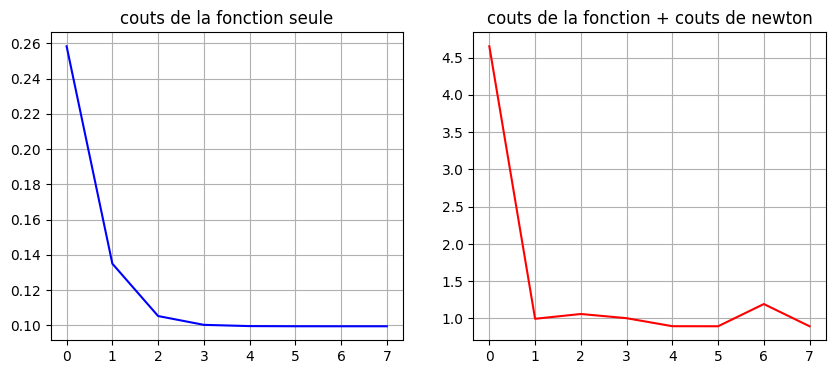

In [32]:

# fig est la fenêtre globale, ax1 et ax2 sont les deux graphiques
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

# 2. Remplir le graphique de GAUCHE (ax1)
ax1.plot(costs, color='blue')
ax1.set_title("couts de la fonction seule")
ax1.grid(True)

# 3. Remplir le graphique de DROITE (ax2)
ax2.plot(costs2, color='red')
ax2.set_title("couts de la fonction + couts de newton")
ax2.grid(True)

plt.show()

On va maintenant s'intéresser à l'influence de $\mu$. On fixe maintenant `varepsilon` à $10^{-6}$ et on va tracer la courbe d'évolution de la fonction à minimiser (en échelle log, et en traçant la fonction auquelle on a retiré `costmin`) pour différentes valeurs de $\mu$ dans `mu_list` ci-dessous. La valeur de `cost_min` est inchangée et est la valeur trouvée pour `varepsilon` à $10^{-9}$.

Fonction (x,y) --> 100*(y-x^2)^2 +(1-x)^2
minimal value  0.09948043368674349
x [0.68525199 0.46757805]
Fonction (x,y) --> 100*(y-x^2)^2 +(1-x)^2
minimal value  0.0994804336867435
x [0.68525199 0.46757805]
Fonction (x,y) --> 100*(y-x^2)^2 +(1-x)^2
minimal value  0.09956575583954887
x [0.68523861 0.46755959]
Fonction (x,y) --> 100*(y-x^2)^2 +(1-x)^2
minimal value  0.09956575583954887
x [0.68523861 0.46755959]
Fonction (x,y) --> 100*(y-x^2)^2 +(1-x)^2
minimal value  0.10027218456956737
x [0.68509652 0.46736368]
Fonction (x,y) --> 100*(y-x^2)^2 +(1-x)^2
minimal value  0.09965596471183116
x [0.68522281 0.4675378 ]


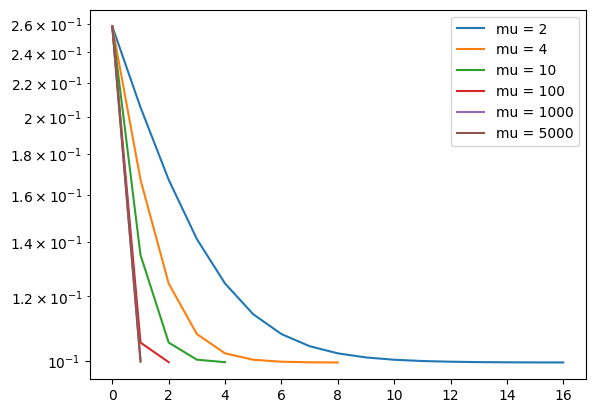

In [20]:
mu_list=[2,4,10,100,1000,5000]

for mu in mu_list :
    i = mu_list.index(mu)
    f_t=non_lin_cst(func.Rosen(),square2(),10)
    costs.append(" ")
    costs[i],x=central_path(f_t,mu_list[i],1.e-6,np.array([0,0]))
    cost_min=np.min(costs[i])
    print('minimal value ',cost_min) # minimal value  0.0994618583079908
    print('x',x) # x [0.68525439 0.46758135]

plt.figure()
plt.yscale("log")
for i in range(len(mu_list)):
    plt.plot(costs[i], label="mu = "+str(mu_list[i]))
plt.legend()
plt.show()

Voyez-vous une grande différence quand $\mu$ varie ?
Sur l’échelle logarithmique, les coûts décroissent de manière quasi-linéaire, ce qui illustre la convergence linéaire de la méthode de point intérieur.
La valeur de mu contrôle la rapidité d’augmentation du paramètre de barrière :
	•	un petit mu rend le chemin central plus progressif,
	•	un grand mu accélère le chemin mais rend les sous-problèmes plus raides.
Sur tous les tracés en échelle logarithmique, on observe une décroissance linéaire des coûts, confirmant la convergence linéaire de l’algorithme.


## Problème avec multiples contraintes linéaires
On s'intéresse maintenant aux problèmes de la forme
$$
	(\mathcal{P}_{t, \text{ lin.}}) \qquad \umin{x\in \mathbb{R}^d, } f_t(x) \eqdef f(x) - \frac{1}{t} \text{Log}( b-A x  ),
$$
qui approximent, quand $t$ tend vers $+\infty$ des problèmes du genre
$$
    (\mathcal{P}_{\infty,\text{ lin.}}) \qquad \umin{x\in \mathbb{R}^n, A x \leq b} f(x)
$$
Calculez ci-dessous le gradient et la Hessienne de $f_t$ en fonction de $A$,$b$,t et du gradient et de la Hessienne de $f$  
$$\nabla f_t(x) = ?? \quad H[f_t](x) = ?? $$

Créez une classe de fonction $class lin_cst()$ qui prend au constructeur la fonction $f$, la matrice $A$, le vecteur $b$ le scalaire $t$ et  et qui calcule la valeur de $f_t$. Cette fonction devra agir comme $class non_lin_cst()$ et notamment avoir un attribut `nb_constraints`

In [8]:

class lin_cst() :
    def __init__(self,f,A,b,t, nb_constraints=1.) :
        self.zeros()
        self.f=f
        self.A=A
        self.b=b
        self.t=t
        self.nb_constraints=nb_constraints # nombre de contraintes du problème
    def zeros(self) :
        self.nb_eval=0 # number of evaluations of the function self.value()
        self.nb_grad=0 # number of evaluations of the function self.grad()
        self.nb_hess=0 # number of evaluations of the function self.Hess()
    def value(self,x) :
        # returns the value of the function at point x
        self.nb_eval += 1
        if min(self.b - self.A@x) <= 0:
            return np.inf
        return self.f.value(x) - 1/self.t * np.sum(np.log(self.b - self.A@x))
    def grad(self,x) :
        # returns the gradient of the function at point x
        self.nb_grad += 1
        grad = self.f.grad(x) + 1/self.t * np.sum(A/(self.b-self.A@x).reshape((np.shape(A)[0],1)),axis = 0)
        return grad.reshape(np.shape(x))#somme colonnes de a divisé par les coefs de a pour cahque ligne
    def Hess(self,x) :
        # returns the Hessian of the function at point x
        #Il faut reshape le gradient sinon ça ne fonctionne pas
        self.nb_hess += 1
        hess = self.f.Hess(x) + 1/self.t * np.transpose(A)@np.diag(1/(self.b-self.A@x)**2)@A
        return hess
    

On va tester notre fonction dans la case ci-dessous

In [9]:
np.random.seed(42)
x=np.zeros(2)
n=10
A=np.random.randn(42,2)
b=np.abs(np.random.randn(42))
x2=np.random.randn(2)
f_t=lin_cst(func.Rosen(),A,b,10)
print(f_t.value(x),f_t.value(x2)) ## 4.717787999246487 inf
print(f_t.grad(x),f_t.grad(x2)) ## [-9.36529883 -1.43185282] [-624.84901174 -313.83869195]
print(f_t.Hess(x)) ## [[1624.61765301  896.38712898] [ 896.38712898  871.39523753]]
print(f_t.Hess(x2)) ## [[2531.87148488  934.54404056][ 934.54404056  476.99362034]]

print('## TEST DE DERIVEE NUMERIQUE##')
d=np.random.randn(2)
opt.deriv_num(f_t,5.e-3*x2,d)

Fonction (x,y) --> 100*(y-x^2)^2 +(1-x)^2
4.717787999246487 inf
[-9.36529883 -1.43185282] [-624.84901174 -313.83869195]
[[1624.61765301  896.38712898]
 [ 896.38712898  871.39523753]]
[[2531.87148488  934.54404056]
 [ 934.54404056  476.99362034]]
## TEST DE DERIVEE NUMERIQUE##
eps 1.0e-01 grad inf ratio 8.1e-01 angle 2.0e+00
eps 1.0e-02 grad 8.3e-01 ratio 1.9e+00 angle 4.8e-04
eps 1.0e-03 grad 4.9e-02 ratio 6.8e-02 angle 4.7e-06
eps 1.0e-04 grad 4.7e-03 ratio 6.4e-03 angle 4.7e-08
eps 1.0e-05 grad 4.7e-04 ratio 6.3e-04 angle 4.7e-10
eps 1.0e-06 grad 4.7e-05 ratio 6.3e-05 angle 4.7e-12
eps 1.0e-07 grad 4.7e-06 ratio 6.3e-06 angle 4.7e-14
eps 1.0e-08 grad 4.6e-07 ratio 6.3e-07 angle 4.4e-16
eps 1.0e-09 grad 6.0e-08 ratio 6.8e-08 angle 2.2e-16
eps 1.0e-10 grad 7.2e-07 ratio 1.4e-07 angle 1.1e-16
eps 1.0e-11 grad 7.2e-07 ratio 6.0e-08 angle 1.8e-14
eps 1.0e-12 grad 7.8e-05 ratio 1.0e-05 angle 1.6e-12


On s'intéresse maintenant au problème particulier du [Lasso](https://en.wikipedia.org/wiki/Lasso_(statistics)), pour retrouver un signal parcimonieux. Le problème du Lasso s'écrit $$
        \umin{w \in \mathbb{R}^p} \frac{1}{2}\Vert Bw-y \Vert_2^2 + \lambda \Vert w \Vert_1
$$
On suppose ici qu'on veut retrouver un signal $w_0$ que l'on sait être parcimonieux (beaucoup de coefficients nuls), quand on n'observe que $y=Bw_0+N$ où $B$ est l'opérateur d'observation dans $ \mathbb{R}^{n \times p}$ avec $n<<p$ et $N$ est un bruit.  On va supposer ici que $B$ est une matrice aléatoire Gaussienne, ce qui pose notre problème dans le cadre du [compressed sensing](https://en.wikipedia.org/wiki/Compressed_sensing).

In [10]:
n = 40
p = 60
np.random.seed(42)
B = np.random.randn(n,p)


On crée `w0` le vecteur que l'on souhaite retrouver, qui est parcimonieux et on génère le signal $y=Bw_0+N$ où $N$ est un bruit gaussien additif. 

In [11]:

np.random.seed(42)
w0 = np.zeros(p) 
I=(p*np.random.rand(4)).astype(int)
print(I)
w0[I] = np.array([.8, -.6, .7, -.9])
N = np.random.randn(n)*np.max(np.abs(B@w0))*.02
y = (B@w0) + N

[22 57 43 35]


On fixe $\lambda = \frac{\lambda_{\max}}{10}$ où $\lambda_{\max} = \Vert B^\top y \Vert_\infty$ est la valeur limite du paramètre pour laquelle on peut montrer que la solution du problème du Lasso est nulle.

In [12]:
lam = np.max(np.abs(B.T @ y))/10

On donne aussi un exemple d'utilisation de la fonction `stem` de matplotlib, utile pour représenter les vecteurs parcimonieux.

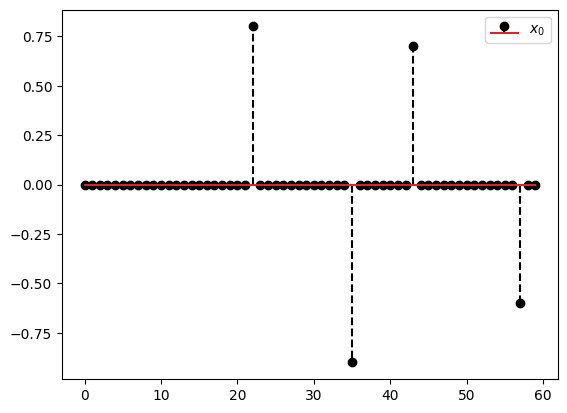

In [13]:
plt.stem( w0, linefmt='--k', markerfmt='ko', label='$x_0$' )
plt.legend()
plt.show()

Afin de re-écrire le problème du Lasso comme un problème d'optimisation lisse sans contrainte, on introduit, pour tout vecteur $w\in \mathbb{R}^p$, on  introduit le vecteur $x=(x_-,x_+)$ tel que $x_-=\max(-w,0)$ et $x_+=\max(w,0)$. On a ainsi toujours 
$$w = x_+ - x_-\quad \text{et}\quad |w|=x_++x_-\quad \text{et}\quad x\ge 0.$$
Le problème revient donc à minimiser, sous la contrainte $x\ge 0$ et en décomposant $x=(x_+,x_-)$
$$ 
    f(x) = \frac{1}{2}\Vert B(x_+-x_-)-y\Vert_2^2 + \lambda \langle x,1\rangle,
$$ 
où $1$ est le vecteur rempli de $1$. Ainsi la contrainte s'écrit bien $Ax \le b$ avec
$A=-\text{Id}_{2p}$, $b=0$.
<div class="alert alert-block alert-info"> Calculez ci-dessous le gradient et la Hessienne de $f$ en fonction de $B,y,\lambda$ et de $x=(x_-,x_+)$  
$$\nabla f(x) = ?? \quad H[f](x) = ?? $$
</div>


Remplissez une classe `class lasso()` qui prend au constructeur `B`, `lam` et `y` qui valent respectivement $B$, $\lambda$ et $y$. Cette classe doit vous calculer $f(x)$, $\nabla f(x)$ ainsi que la Hessienne dans les fonctions idoines.

In [14]:
class lasso() :
    def __init__(self,B,lam,y) :
        self.B = B
        self.lam = lam
        self.y = y
        self.p = B.shape[1]
        self.nb_eval = 0 # number of evaluations of the function self.value()
        self.nb_grad = 0 # number of evaluations of the function self.grad()
        self.nb_hess = 0 # number of evaluations of the function self.Hess
        

    def zeros(self):
        ()

    def value(self, x):
        self.nb_eval += 1
        p = self.p

        x_minus = x[:p]
        x_plus  = x[p:]

        w = x_plus - x_minus
        r = self.B @ w - self.y

        return 0.5 * np.dot(r, r) + self.lam * np.sum(x)

    def grad(self,x) :
        self.nb_grad += 1
        p = self.p

        x_minus = x[:p]
        x_plus  = x[p:]

        w = x_plus - x_minus
        r = self.B @ w - self.y
        Br = self.B.T @ r

        g_minus = -Br + self.lam * np.ones(p)
        g_plus  =  Br + self.lam * np.ones(p)

        return np.concatenate([g_minus, g_plus])
         


    def Hess(self,x) :
        self.nb_hess += 1
        BtB = B.T @ B
        return np.block([
            [ BtB,    -BtB ],
            [-BtB,     BtB ]
        ])








    
f=lasso(B,lam,y)
np.random.seed(42)
x=np.random.randn(2*p)
d=np.random.randn(2*p)
print('## TEST DE LA FONCTION##')
print(f.value(x))                         # 3773.8530531301963
print(f.grad(x).shape,f.grad(x)[3:6])     # (120,) [ 251.02559597 -167.32707254  -38.56035275]
print(f.Hess(x).shape,f.Hess(x)[15][3:6]) # (120, 120) [4.15670644 6.06401088 6.55285271]
print('## TEST DE DERIVEE NUMERIQUE##')
opt.deriv_num(f,x,d)


## TEST DE LA FONCTION##
3773.8530531301967
(120,) [ 251.02559597 -167.32707254  -38.56035275]
(120, 120) [4.15670644 6.06401088 6.55285271]
## TEST DE DERIVEE NUMERIQUE##
eps 1.0e-01 grad 7.8e-01 ratio 2.2e-16 angle 0.0e+00
eps 1.0e-02 grad 7.8e-02 ratio 5.6e-16 angle 0.0e+00
eps 1.0e-03 grad 7.8e-03 ratio 3.6e-15 angle 0.0e+00
eps 1.0e-04 grad 7.8e-04 ratio 2.4e-13 angle 0.0e+00
eps 1.0e-05 grad 7.8e-05 ratio 1.2e-12 angle 0.0e+00
eps 1.0e-06 grad 7.8e-06 ratio 3.2e-11 angle 1.1e-16
eps 1.0e-07 grad 7.8e-07 ratio 3.6e-10 angle 0.0e+00
eps 1.0e-08 grad 9.2e-08 ratio 3.4e-09 angle 3.3e-16
eps 1.0e-09 grad 5.7e-07 ratio 3.0e-08 angle 7.8e-15
eps 1.0e-10 grad 1.0e-05 ratio 3.0e-07 angle 1.0e-12
eps 1.0e-11 grad 3.4e-05 ratio 1.4e-06 angle 7.1e-11
eps 1.0e-12 grad 1.7e-03 ratio 2.5e-05 angle 1.6e-08


Utilisez les classes `lin_cst` et `lasso` définies au dessus pour résoudre le problème du Lasso avec une méthode de Newton, une précision de $10^{-8}$, en partant du point $x_0=1$ pour les différentes valeurs de `t` données dans le tableau `tlist` ci-dessous. Vous afficherez pour chaque `t` le vecteur $w_0$ et sa reconstruction en utilisant le module `plt.stem` donné plus haut dans le notebook. Que remarquez vous sur la solution ? Pouvez-vous l'expliquer ?
<div class="alert alert-block alert-info"> VOTRE REPONSE CI-DESSOUS
</div>


In [15]:
tlist = np.array([1, 10, 100, 1000])

Testez ci-dessous la fonction `central_path`. Vous mettrez une tolérance de $10^{-5}$.

Pour les différentes valeurs de `lam_list` donnez ci-dessous, lancez l'algorithme d'optimisation `central_path` pour résoudre le problème du Lasso. vous mettrez une tolérance de $10^{-4}$. Que remarquez-vous quand $\lambda$ var

In [16]:
lam_list = np.array([0.01*lam, 0.1*lam, lam,4*lam])